In [1]:
import pandas as pd
import numpy as np

from seaborn import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Question 1
## Prepare a model for glass classification using KNN



In [2]:
data_glass=pd.read_csv(r"C:\Users\Karan\Downloads\glass.csv")
data_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
import dtale 

In [4]:
eda= dtale.show(data_glass)
eda

In [5]:
from pandas_profiling import ProfileReport

2022-10-19 15:32:10,593 - INFO     - Pandas backend loaded 1.3.4
2022-10-19 15:32:10,619 - INFO     - Numpy backend loaded 1.20.3
2022-10-19 15:32:10,621 - INFO     - Pyspark backend NOT loaded
2022-10-19 15:32:10,623 - INFO     - Python backend loaded


In [6]:
profile = ProfileReport(data_glass, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
corr=data_glass.corr()
corr


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


2022-10-19 15:32:55,369 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


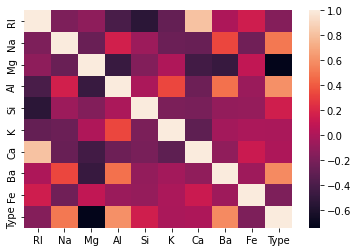

In [8]:
%matplotlib inline
heatmap(corr)
plt.show()

In [9]:
scaler = StandardScaler()
scaler.fit(data_glass.drop('Type', axis=1))

StandardScaler()

In [10]:
# Perform transformation
scaler_feat = scaler.transform(data_glass.drop('Type', axis=1))
scaler_feat


array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [11]:

import seaborn as sns

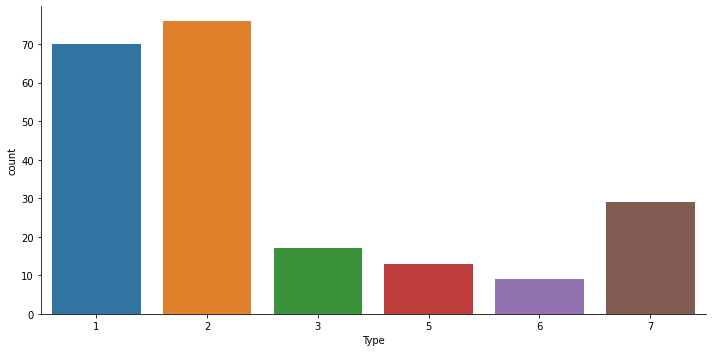

In [12]:
sns.factorplot('Type', data=data_glass, kind="count",size = 5,aspect = 2)

In [13]:
data_glass_std = pd.DataFrame(scaler_feat, columns=data_glass.columns[:-1])
data_glass_std

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [14]:
x = data_glass_std
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [15]:
y = data_glass['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [17]:
x_train.shape

(160, 9)

In [18]:
x_test.shape

(54, 9)

In [19]:

y_train.shape

(160,)

In [20]:

y_test.shape

(54,)

In [21]:
num_folds = 10
kfold = KFold(n_splits=8)

model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, x_train, y_train, cv=kfold)

print(results.mean())

In [22]:
#Grid Search for Algorithm Tuning
# Grid Search for Algorithm Tuning

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.6729789590254706
{'n_neighbors': 2}


In [24]:
# Choose K between 1 to 40

k_range = range(1, 40)
k_scores = []


In [25]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

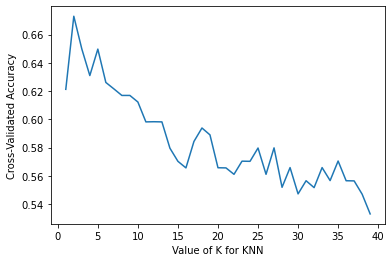

In [26]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, x_train, y_train, cv=kfold)

print(results.mean())

0.75


In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [29]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.86      0.55        14
           2       0.81      0.57      0.67        23
           3       0.00      0.00      0.00         6
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      0.80      0.89         5

    accuracy                           0.59        54
   macro avg       0.70      0.54      0.57        54
weighted avg       0.65      0.59      0.58        54



In [30]:
accuracy_score(y_test, y_pred)

0.5925925925925926

In [31]:
#k=5
model_1 = KNeighborsClassifier(n_neighbors=5)
results_1 = cross_val_score(model_1, x_train, y_train, cv=kfold)

print(results_1.mean())

0.6875


In [32]:
model_1.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = model_1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.71      0.51        14
           2       0.75      0.65      0.70        23
           3       0.00      0.00      0.00         6
           5       0.67      0.67      0.67         3
           6       1.00      0.33      0.50         3
           7       1.00      0.80      0.89         5

    accuracy                           0.59        54
   macro avg       0.64      0.53      0.54        54
weighted avg       0.61      0.59      0.58        54



In [34]:
accuracy_score(y_test, y_pred)

0.5925925925925926

# Question 2
## Implement a KNN model to classify the animals in to categorie

In [36]:
data_zoo=pd.read_csv(r"C:\Users\Karan\Downloads\Zoo.csv")
data_zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [37]:
profile1 = ProfileReport(data_zoo,title="profiling report")
profile1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

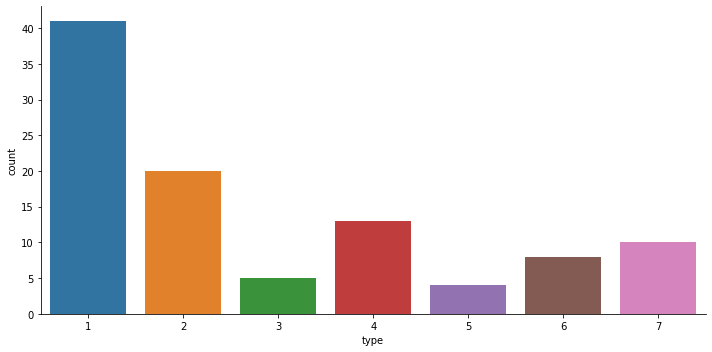

In [38]:

sns.factorplot('type', data=data_zoo, kind="count",size = 5,aspect = 2)

In [39]:
data_zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [40]:
# Split features and class variable
X = data_zoo.iloc[:, 1:17]
Y = data_zoo['type']

In [41]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [43]:
# Split dataset, train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [44]:
num_folds = 10
kfold = KFold(n_splits=10)
knn_model = KNeighborsClassifier(n_neighbors=13)
results = cross_val_score(knn_model, x_train, y_train, cv=kfold)

print(results.mean()*100)

75.71428571428571


In [45]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn_model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.9333333333333333
{'n_neighbors': 1}


In [47]:
k_range = range(1, 41)
k_scores = []

In [48]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())

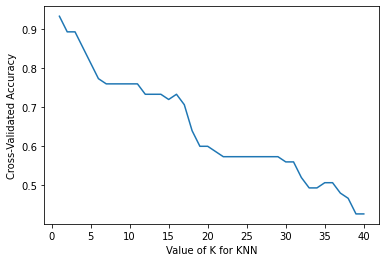

In [49]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(knn_model, x_train, y_train, cv=kfold)

print(results.mean()*100)

92.14285714285715


In [51]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [53]:
accuracy_score(y_test, y_pred)*100

100.0

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(x_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(x_test)

In [56]:
scores = []
cv_scores = []

In [57]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [58]:
score_knn=cross_val_score(knn, x,y, cv=10)

In [59]:
score_knn.mean()

0.6632034632034632

In [60]:
score_knn.std()*2

0.16199039335586796

In [61]:
cv_score = score_knn.mean()

In [62]:
cv_scores.append(cv_score)

In [63]:
cv_scores

[0.6632034632034632]